In [56]:
import os
import warnings
warnings.filterwarnings('ignore')

import logging
import numpy as np

import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np

import geopandas as gpd
from shapely import Point, LineString, Polygon, MultiPoint
from shapely.ops import nearest_points
from sklearn.cluster import DBSCAN

from tqdm import tqdm
tqdm.pandas()

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path = '/usr/local/src/python3.10/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/KoPub Dotum Medium.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 삼각함수

In [2]:
angle_deg = 30 #각도
angle_rad = math.radians(angle_deg) #라디안으로 변환

sin_value = math.sin(angle_rad)
cos_value = math.cos(angle_rad)
tan_value = math.tan(angle_rad)

print(f"sin({angle_deg}°) = {sin_value}")
print(f"cos({angle_deg}°) = {cos_value}")
print(f"tan({angle_deg}°) = {tan_value}")

sin(30°) = 0.49999999999999994
cos(30°) = 0.8660254037844387
tan(30°) = 0.5773502691896257


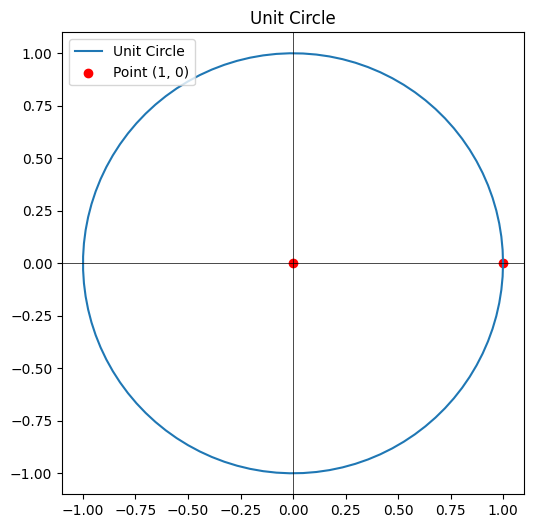

In [5]:
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)  # x 좌표
y = np.sin(theta)  # y 좌표

# 단위원 그리기
plt.figure(figsize=(6, 6))
plt.plot(x, y, label='Unit Circle')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.scatter([0, 1], [0, 0], color='red', label='Point (1, 0)')  # 예시 점
plt.gca().set_aspect('equal')
plt.title("Unit Circle")
plt.legend()
plt.show()

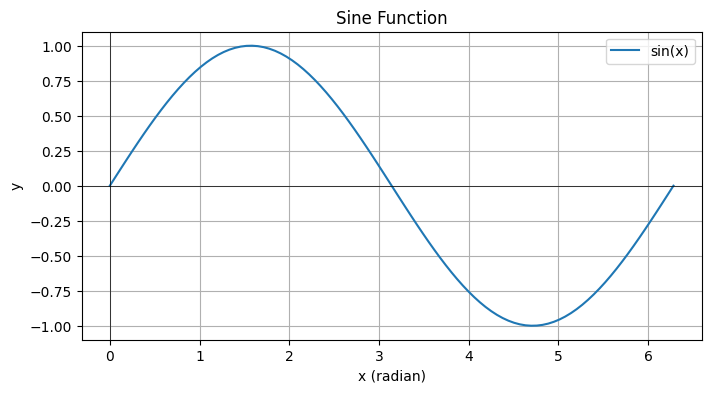

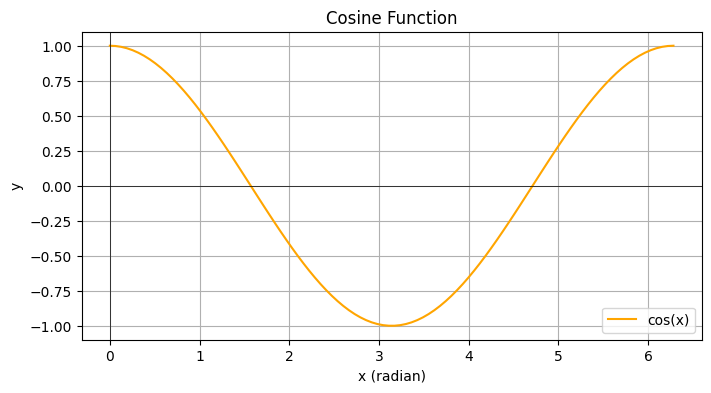

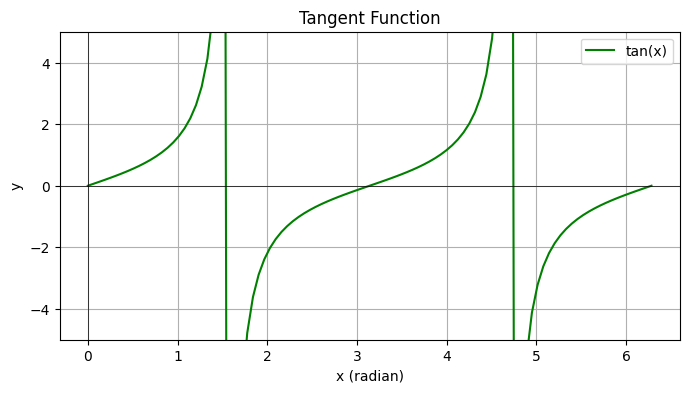

In [6]:
# x 값 생성 (0부터 2π까지)
x = np.linspace(0, 2 * np.pi, 100)

# 삼각함수 계산
sin_y = np.sin(x)
cos_y = np.cos(x)
tan_y = np.tan(x)

# 사인 그래프
plt.figure(figsize=(8, 4))
plt.plot(x, sin_y, label='sin(x)')
plt.title("Sine Function")
plt.xlabel("x (radian)")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

# 코사인 그래프
plt.figure(figsize=(8, 4))
plt.plot(x, cos_y, label='cos(x)', color='orange')
plt.title("Cosine Function")
plt.xlabel("x (radian)")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

# 탄젠트 그래프 (수직 점근선 주의)
plt.figure(figsize=(8, 4))
plt.plot(x, tan_y, label='tan(x)', color='green')
plt.ylim(-5, 5)  # 그래프 보기 좋게 제한
plt.title("Tangent Function")
plt.xlabel("x (radian)")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid()
plt.show()

In [8]:
# 예시: 빗변이 10이고, 한 변이 6인 직각삼각형
hypotenuse = 12
adjacent = 6

# 코사인을 이용해 각도를 계산
angle_rad = math.acos(adjacent / hypotenuse)
angle_deg = math.degrees(angle_rad)

print(f"각도: {angle_deg}°")

# 대변의 길이 계산
opposite = math.sqrt(hypotenuse**2 - adjacent**2)
print(f"대변의 길이: {opposite}")

각도: 60.00000000000001°
대변의 길이: 10.392304845413264


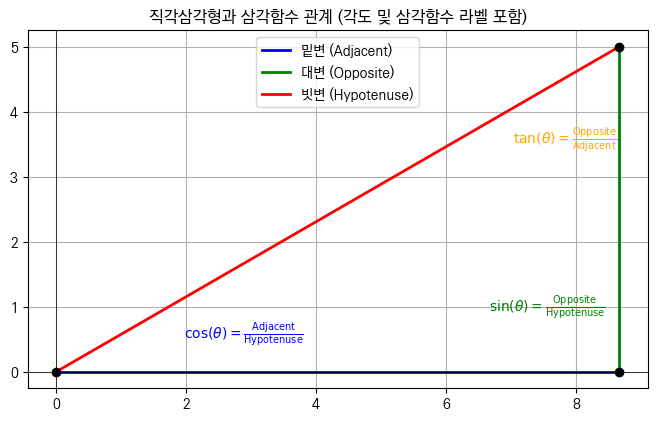

In [34]:
# 라벨에서 LaTeX 문법을 순수하게 사용해 수정
plt.figure(figsize=(8, 6))

# 직각삼각형의 변
plt.plot([0, adjacent], [0, 0], label="밑변 (Adjacent)", color="blue", linewidth=2)  # 밑변
plt.plot([adjacent, adjacent], [0, opposite], label="대변 (Opposite)", color="green", linewidth=2)  # 대변
plt.plot([0, adjacent], [0, opposite], label="빗변 (Hypotenuse)", color="red", linewidth=2)  # 빗변

# # 각도 θ 표시 (아래쪽)
# angle_arc = np.linspace(0, angle_rad, 50)
# arc_x = 1.5 * np.cos(angle_arc)
# arc_y = 1.5 * np.sin(angle_arc)
# plt.plot(arc_x, arc_y, color="purple", linewidth=1.5)
# plt.text(0.5, 0.2, r"$\theta$", fontsize=14, color="purple")

# # 반대쪽 각 표시 (위쪽)
# plt.text(adjacent - 1.5, 0.5, r"$90^\circ - \theta$", fontsize=12, color="purple")

# 라벨 위치에 삼각함수 명칭 추가
plt.text(adjacent / 3, 0.5, r"$\cos(\theta) = \frac{\mathrm{Adjacent}}{\mathrm{Hypotenuse}}$", fontsize=10, color="blue", ha="center")
plt.text(adjacent -2, opposite / 5, r"$\sin(\theta) = \frac{\mathrm{Opposite}}{\mathrm{Hypotenuse}}$", fontsize=10, color="green", va="center")
plt.text(adjacent / 2 + 2.7, 3.5, r"$\tan(\theta) = \frac{\mathrm{Opposite}}{\mathrm{Adjacent}}$", fontsize=10, color="orange")

# 점 추가
plt.scatter([0, adjacent, adjacent], [0, 0, opposite], color="black", zorder=5)

# 축 설정
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.gca().set_aspect("equal")
plt.title("직각삼각형과 삼각함수 관계 (각도 및 삼각함수 라벨 포함)")
plt.legend()
plt.grid()
plt.show()


## 시간표현

Hour: 0, sin: 0.00, cos: 1.00
Hour: 1, sin: 0.26, cos: 0.97
Hour: 2, sin: 0.50, cos: 0.87
Hour: 3, sin: 0.71, cos: 0.71
Hour: 4, sin: 0.87, cos: 0.50
Hour: 5, sin: 0.97, cos: 0.26
Hour: 6, sin: 1.00, cos: 0.00
Hour: 7, sin: 0.97, cos: -0.26
Hour: 8, sin: 0.87, cos: -0.50
Hour: 9, sin: 0.71, cos: -0.71
Hour: 10, sin: 0.50, cos: -0.87
Hour: 11, sin: 0.26, cos: -0.97
Hour: 12, sin: 0.00, cos: -1.00
Hour: 13, sin: -0.26, cos: -0.97
Hour: 14, sin: -0.50, cos: -0.87
Hour: 15, sin: -0.71, cos: -0.71
Hour: 16, sin: -0.87, cos: -0.50
Hour: 17, sin: -0.97, cos: -0.26
Hour: 18, sin: -1.00, cos: -0.00
Hour: 19, sin: -0.97, cos: 0.26
Hour: 20, sin: -0.87, cos: 0.50
Hour: 21, sin: -0.71, cos: 0.71
Hour: 22, sin: -0.50, cos: 0.87
Hour: 23, sin: -0.26, cos: 0.97


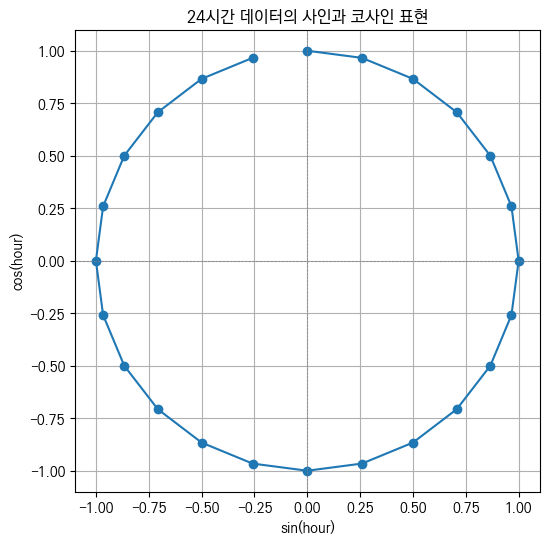

In [40]:
import numpy as np

# 24시간 데이터를 생성
hours = np.arange(0, 24)  # 0시부터 23시까지

# 라디안으로 변환
hours_rad = (hours / 24) * 2 * np.pi

# 사인과 코사인 계산
sin_values = np.sin(hours_rad)
cos_values = np.cos(hours_rad)

# 출력
for hour, sin_val, cos_val in zip(hours, sin_values, cos_values):
    print(f"Hour: {hour}, sin: {sin_val:.2f}, cos: {cos_val:.2f}")

import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
plt.plot(sin_values, cos_values, marker='o')
plt.title("24시간 데이터의 사인과 코사인 표현")
plt.xlabel("sin(hour)")
plt.ylabel("cos(hour)")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.grid()
plt.show()


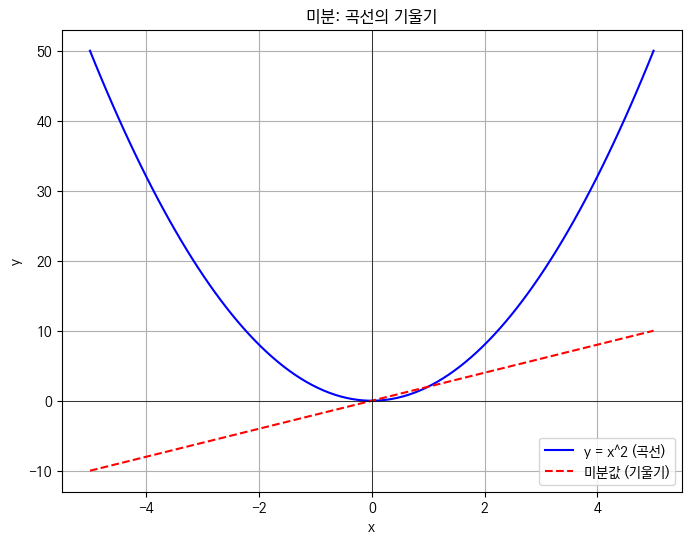

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
x = np.linspace(-5, 5, 100)
y = 2*x**2  # 곡선 y = x^2
dy_dx = 2 * x  # 미분값

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="y = x^2 (곡선)", color="blue")
plt.plot(x, dy_dx, label="미분값 (기울기)", color="red", linestyle="--")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("미분: 곡선의 기울기")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

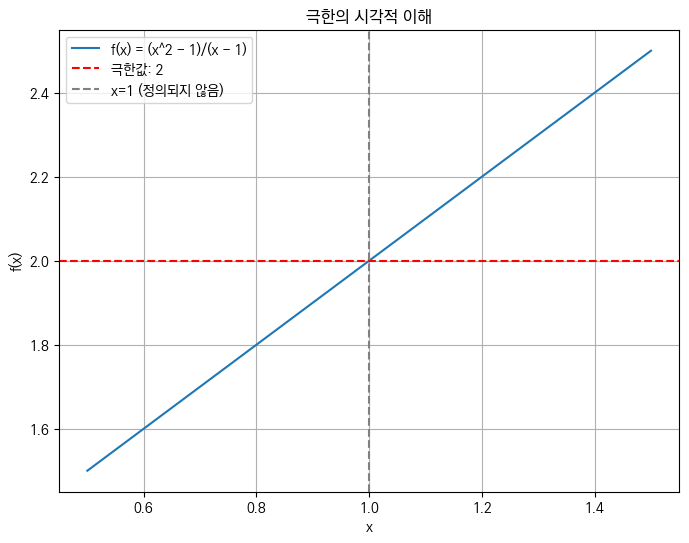

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def f(x):
    return (x**2 - 1) / (x - 1)

# x 값 생성 (x=1 제외)
x = np.linspace(0.5, 1.5, 100)
y = f(x)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(x, y, label="f(x) = (x^2 - 1)/(x - 1)")
plt.axhline(2, color="red", linestyle="--", label="극한값: 2")
plt.axvline(1, color="gray", linestyle="--", label="x=1 (정의되지 않음)")
plt.title("극한의 시각적 이해")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()


In [51]:
import math

# 벡터 정의
vector = [3, 4]  # 2차원 벡터

# 벡터의 길이 계산
magnitude = math.sqrt(vector[0]**2 + vector[1]**2)
print("벡터의 길이:", magnitude)


벡터의 길이: 5.0


In [52]:
# 두 벡터 정의
vector_1 = [3, 4]
vector_2 = [2, 1]

# 벡터 더하기
vector_sum = [vector_1[0] + vector_2[0], vector_1[1] + vector_2[1]]
print("벡터의 합:", vector_sum)


벡터의 합: [5, 5]


In [62]:
import numpy as np

# 2D 벡터 정의
vector = np.array([1, 1])  # 원래 벡터 (x=1, y=0)

# 90도 회전 변환 행렬
theta = np.pi / 4  # 라디안 단위
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# 벡터 변환
rotated_vector = np.dot(rotation_matrix, vector)
print("회전된 벡터:", rotated_vector)


회전된 벡터: [1.11022302e-16 1.41421356e+00]


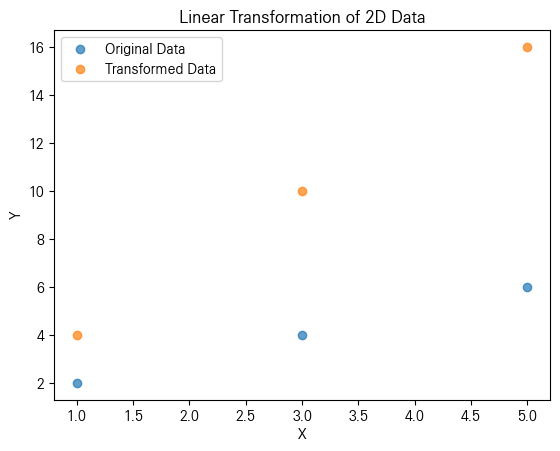

In [65]:
x = np.array([
    [1,2],
    [3,4],
    [5,6]
])

A = np.array([
    [1,2],
    [0,1],
])

transformed_data = np.dot(x, A)

# 시각화
plt.scatter(x[:, 0], x[:, 1], label="Original Data", alpha=0.7)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], label="Transformed Data", alpha=0.7)
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Transformation of 2D Data")
plt.show()

In [67]:
P_A = 3 / 6
P_B_given_A = 1/3
P_B = P_A * P_B_given_A
print(P_B)

0.16666666666666666


In [70]:
pd.Series([5,15,25,35,45]).describe()

count     5.000000
mean     25.000000
std      15.811388
min       5.000000
25%      15.000000
50%      25.000000
75%      35.000000
max      45.000000
dtype: float64

In [71]:
2/6 * 1/6

0.05555555555555555

In [76]:
np.sqrt(np.var(pd.Series([5,15,25,35,45])))

14.142135623730951

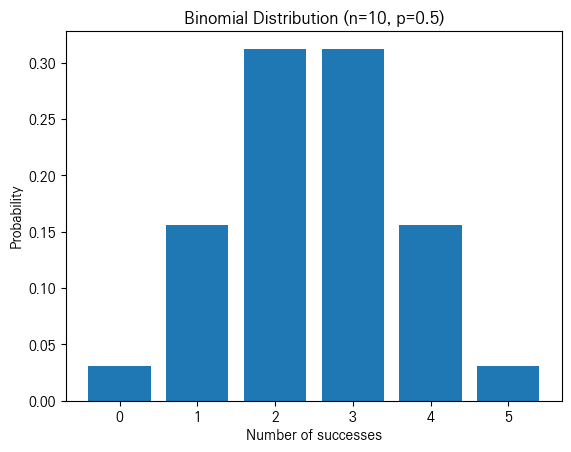

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 파라미터 설정
n = 5  # 시행 횟수
p = 0.5  # 성공 확률

# 확률 질량 함수(PMF) 계산
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

# 시각화
plt.bar(x, pmf)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.show()


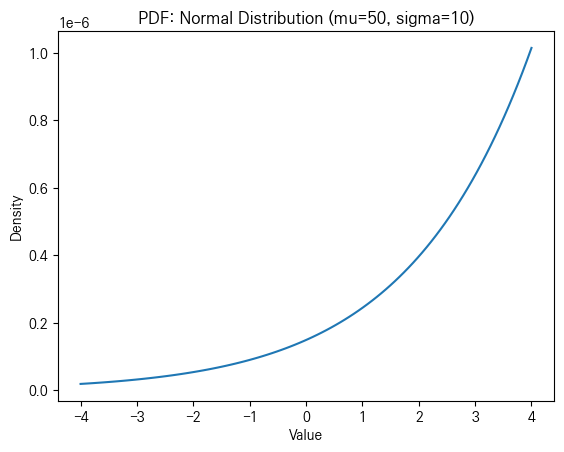

In [83]:
from scipy.stats import norm
mu = 50  # 평균
sigma = 10  # 표준편차
x = np.linspace(-4, 4, 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf)
plt.title("PDF: Normal Distribution (mu=50, sigma=10)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()